Data gotten from https://archive.ics.uci.edu/ml/datasets/online+retail

**Customer Churn Prediction**
1. What is the total revenue generated per customer?
2. How frequently do customers make purchases?
3. What is the average order value per customer?

**Sales Performance Dashboard**
4. What are the total sales by product category?
5. What are the total sales by country?
6. What is the monthly sales trend?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)

# Display the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
# Calculate total revenue per customer
data['Revenue'] = data['UnitPrice'] * data['Quantity']
total_revenue_per_customer = data.groupby('CustomerID')['Revenue'].sum().reset_index()
total_revenue_per_customer.head(10)

,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,1545.41
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


In [17]:
# Calculate purchase frequency per customer
purchase_frequency_per_customer = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
purchase_frequency_per_customer.columns = ['CustomerID', 'PurchaseFrequency']
purchase_frequency_per_customer.head(100)

,CustomerID,PurchaseFrequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
95,12462.0,4
96,12463.0,7
97,12464.0,8
98,12465.0,3


In [18]:
# Calculate average order value per customer
average_order_value_per_customer = data.groupby('CustomerID')['Revenue'].mean().reset_index()
average_order_value_per_customer.columns = ['CustomerID', 'AvgOrderValue']
average_order_value_per_customer.head(100)

,CustomerID,AvgOrderValue
0,12346.0,0.000000
1,12347.0,23.681319
2,12348.0,57.975484
3,12349.0,24.076027
4,12350.0,19.670588
...,...,...
95,12462.0,15.611250
96,12463.0,14.813977
97,12464.0,41.794828
98,12465.0,14.390000


In [19]:
# Calculate total sales by product category
total_sales_by_product_category = data.groupby('Description')['Revenue'].sum().reset_index()
total_sales_by_product_category = total_sales_by_product_category.sort_values(by='Revenue', ascending=False)
total_sales_by_product_category.head(100)

,Description,Revenue
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
...,...,...
2057,LUNCH BAG SPACEBOY DESIGN,17850.01
1627,GROW A FLYTRAP OR SUNFLOWER IN TIN,17837.45
1648,HAND WARMER OWL DESIGN,17651.98
2953,RETROSPOT HEART HOT WATER BOTTLE,17609.53


In [20]:
# Calculate total sales by country
total_sales_by_country = data.groupby('Country')['Revenue'].sum().reset_index()
total_sales_by_country = total_sales_by_country.sort_values(by='Revenue', ascending=False)
total_sales_by_country.head(50)

,Country,Revenue
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


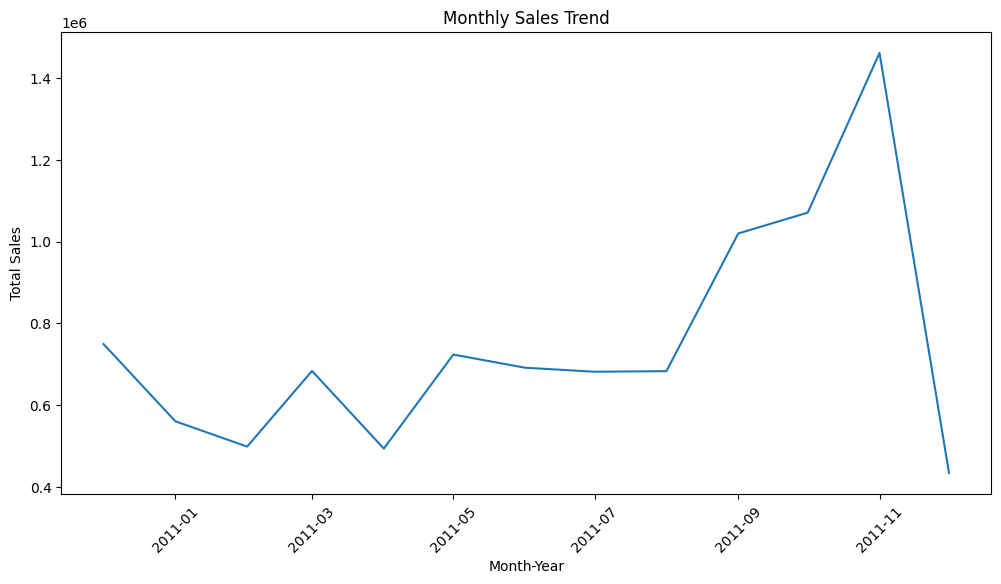

In [22]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate monthly sales trend
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales_trend = data.groupby('MonthYear')['Revenue'].sum().reset_index()
monthly_sales_trend.head()


# Convert MonthYear back to a datetime format for plotting
monthly_sales_trend['MonthYear'] = monthly_sales_trend['MonthYear'].dt.to_timestamp()


# Plot monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_trend, x='MonthYear', y='Revenue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()